<a href="https://colab.research.google.com/github/tarun422/Mobile-Price-Range-Prediction/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

***In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df=pd.read_csv('/content/drive/MyDrive/cap 3/data_mobile_price_range.csv')


In [7]:
shapes=df.shape
print("Row is",shapes[0])
print("Column is",shapes[1])

Row is 2000
Column is 21


In [8]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [9]:
df.head(5).T

,0,1,2,3,4
battery_power,842.0,1021.0,563.0,615.0,1821.0
blue,0.0,1.0,1.0,1.0,1.0
clock_speed,2.2,0.5,0.5,2.5,1.2
dual_sim,0.0,1.0,1.0,0.0,0.0
fc,1.0,0.0,2.0,0.0,13.0
four_g,0.0,1.0,1.0,0.0,1.0
int_memory,7.0,53.0,41.0,10.0,44.0
m_dep,0.6,0.7,0.9,0.8,0.6
mobile_wt,188.0,136.0,145.0,131.0,141.0
n_cores,2.0,3.0,5.0,6.0,2.0


In [10]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [12]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [14]:
list_of_columns=['battery_power','blue','dual_sim','fc','four_g','int_memory',
                'mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h',
                 'sc_w','talk_time', 'three_g','touch_screen','wifi','price_range']

In [15]:
for i in list_of_columns:
 df[i]=df[i].astype('int16')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int16  
 1   blue           2000 non-null   int16  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int16  
 4   fc             2000 non-null   int16  
 5   four_g         2000 non-null   int16  
 6   int_memory     2000 non-null   int16  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int16  
 9   n_cores        2000 non-null   int16  
 10  pc             2000 non-null   int16  
 11  px_height      2000 non-null   int16  
 12  px_width       2000 non-null   int16  
 13  ram            2000 non-null   int16  
 14  sc_h           2000 non-null   int16  
 15  sc_w           2000 non-null   int16  
 16  talk_time      2000 non-null   int16  
 17  three_g        2000 non-null   int16  
 18  touch_sc

In [17]:
df.head(5).T

,0,1,2,3,4
battery_power,842.0,1021.0,563.0,615.0,1821.0
blue,0.0,1.0,1.0,1.0,1.0
clock_speed,2.2,0.5,0.5,2.5,1.2
dual_sim,0.0,1.0,1.0,0.0,0.0
fc,1.0,0.0,2.0,0.0,13.0
four_g,0.0,1.0,1.0,0.0,1.0
int_memory,7.0,53.0,41.0,10.0,44.0
m_dep,0.6,0.7,0.9,0.8,0.6
mobile_wt,188.0,136.0,145.0,131.0,141.0
n_cores,2.0,3.0,5.0,6.0,2.0


In [18]:
df.duplicated().sum()

0

In [19]:
df.rename(columns={'battery_power':'mah',
                   'fc':'Front_cam',
                   'pc':'Primary_cam'},inplace=True)

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mah,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
Front_cam,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [21]:
df.nunique()

mah             1094
blue               2
clock_speed       26
dual_sim           2
Front_cam         20
four_g             2
int_memory        63
m_dep             10
mobile_wt        121
n_cores            8
Primary_cam       21
px_height       1137
px_width        1109
ram             1562
sc_h              15
sc_w              19
talk_time         19
three_g            2
touch_screen       2
wifi               2
price_range        4
dtype: int64

In [22]:
df.describe()

,mah,blue,clock_speed,dual_sim,Front_cam,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mah,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
Front_cam,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0




1.   2000 counts for all columns
2.   mah distribution looks alright
3.   bluetooth contain two values alright no problem (contain 0 which is posible)
4.   clockspeed distribution also looks normal
5.   dual sim contain two values alright no problem (contain 0 which is posible)
6.   front cam contain diffrent range of values (contain 0 which is posible)
7.   four_g contain two values alright no problem (contain 0 which is posible)
8.   internel memory distribution also normal
9.   maximum depth distribution also looks normal
10.  mobile weight distribution also looks normal
11.  number of cores distribution also looks normal
12.  primary camera distribution also looks normal (contain 0 which is posible)
13. ***pixel resolution height (contain 0 which is not posible)***
14. pixel resolution width distribution looks normal
15. ram is also looks normal
16. screen height is also looks normal
17. ***screen weidth (contain 0 which is not posible)***
18. talk time also looks normal 
19. three g  contain two values(contain 0 which is posible)
20. touch screen contain two values (contain 0 which is posible)
21. wifi contain two values (contain 0 which is posible)
22. prige range distribution looks normal

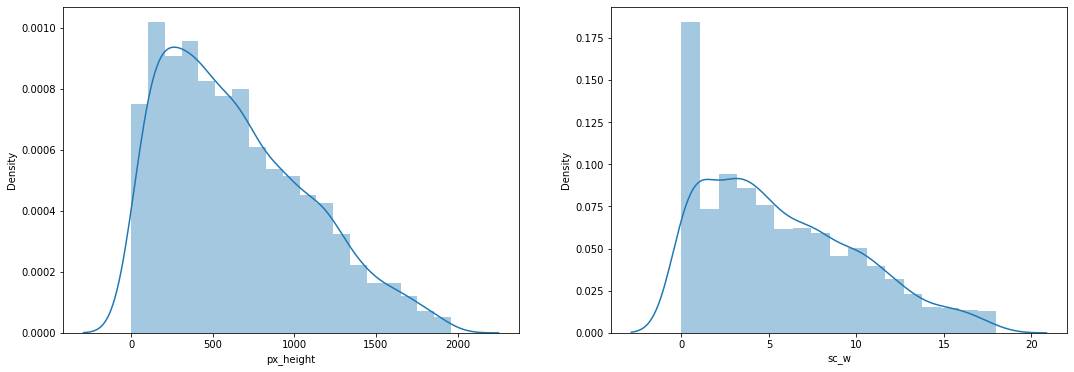

In [27]:
fig = plt.figure(figsize=(18, 6))
plt.subplot(1,2,1)
sns.distplot(df['px_height'])
plt.subplot(1,2,2)
sns.distplot(df['sc_w'])

In [28]:
df[df['px_height']==0]

,mah,blue,clock_speed,dual_sim,Front_cam,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1481,1834,0,2.1,0,7,1,40,0.1,99,4,...,0,1987,3692,13,0,16,1,1,0,3
1933,897,1,2.0,0,3,1,2,0.6,154,8,...,0,994,1958,7,5,7,1,1,0,1


In [39]:
df.drop(index=[1481,1933],inplace=True)

In [44]:
df[df['sc_w']==0].shape[0]

179

knn imputer

In [45]:
df['sc_w']=df['sc_w'].replace(0,np.nan)

In [47]:
from sklearn.impute import KNNImputer
knnimputer=KNNImputer(n_neighbors=1)
df=pd.DataFrame(knnimputer.fit_transform(df),columns=df.columns)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mah           1998 non-null   float64
 1   blue          1998 non-null   float64
 2   clock_speed   1998 non-null   float64
 3   dual_sim      1998 non-null   float64
 4   Front_cam     1998 non-null   float64
 5   four_g        1998 non-null   float64
 6   int_memory    1998 non-null   float64
 7   m_dep         1998 non-null   float64
 8   mobile_wt     1998 non-null   float64
 9   n_cores       1998 non-null   float64
 10  Primary_cam   1998 non-null   float64
 11  px_height     1998 non-null   float64
 12  px_width      1998 non-null   float64
 13  ram           1998 non-null   float64
 14  sc_h          1998 non-null   float64
 15  sc_w          1998 non-null   float64
 16  talk_time     1998 non-null   float64
 17  three_g       1998 non-null   float64
 18  touch_screen  1998 non-null 

In [50]:
listbb=['mah','blue','dual_sim','Front_cam','four_g','int_memory','mobile_wt','n_cores','Primary_cam','px_height','px_width','ram','sc_h','talk_time','three_g','touch_screen','wifi','price_range']

In [51]:
for i in listbb:
 df[i]=df[i].astype('int16')

In [53]:
df.head()

,mah,blue,clock_speed,dual_sim,Front_cam,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7.0,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3.0,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2.0,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8.0,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2.0,15,1,1,0,1


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mah           1998 non-null   int16  
 1   blue          1998 non-null   int16  
 2   clock_speed   1998 non-null   float64
 3   dual_sim      1998 non-null   int16  
 4   Front_cam     1998 non-null   int16  
 5   four_g        1998 non-null   int16  
 6   int_memory    1998 non-null   int16  
 7   m_dep         1998 non-null   float64
 8   mobile_wt     1998 non-null   int16  
 9   n_cores       1998 non-null   int16  
 10  Primary_cam   1998 non-null   int16  
 11  px_height     1998 non-null   int16  
 12  px_width      1998 non-null   int16  
 13  ram           1998 non-null   int16  
 14  sc_h          1998 non-null   int16  
 15  sc_w          1998 non-null   float64
 16  talk_time     1998 non-null   int16  
 17  three_g       1998 non-null   int16  
 18  touch_screen  1998 non-null 

In [54]:
df.nunique()

mah             1093
blue               2
clock_speed       26
dual_sim           2
Front_cam         20
four_g             2
int_memory        63
m_dep             10
mobile_wt        121
n_cores            8
Primary_cam       21
px_height       1136
px_width        1109
ram             1561
sc_h              15
sc_w              18
talk_time         19
three_g            2
touch_screen       2
wifi               2
price_range        4
dtype: int64